In [1]:
# Jupyter Notebook Script for a DCGAN
# COSC 525 - Deep Learning
# Final Project
# Title: Enhancing database with GAN samples for Mammography Classification
# Christoph Metzner
# 04/13/2020

In [2]:
# Generell Libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Function to loading dataset
import cv2
import glob
# Paths to individual folders containing images regarding classes
malignant_path = r"C:\Users\chris\Desktop\Studium\PhD\Courses\Spring 2020\COSC 525 - Deep Learning\DeepLearning_FinalProject\Dataset\Malignant\\"
benign_path = r"C:\Users\chris\Desktop\Studium\PhD\Courses\Spring 2020\COSC 525 - Deep Learning\DeepLearning_FinalProject\Dataset\Benign\\"
normal_path = r"C:\Users\chris\Desktop\Studium\PhD\Courses\Spring 2020\COSC 525 - Deep Learning\DeepLearning_FinalProject\Dataset\Normal\\"

# list containing all paths
class_paths = [malignant_path, benign_path, normal_path]

# Function to load and store datasets
def load_datasets(class_paths):
    datasets = []
    for class_path in class_paths:
        dataset = []
        for image in glob.glob(class_path + "*.jpg"):
            dataset.append(cv2.imread(image))
        datasets.append(dataset)
    return(datasets[0], datasets[1], datasets[2])

In [4]:
# Call function load_datasets
malignant_images, benign_images, normal_images = load_datasets(class_paths = class_paths)

In [8]:
normal_images[0].shape
#input_shape for keras layer (number_images, pixels_width, pixels_length, channels)

(1024, 1024, 3)

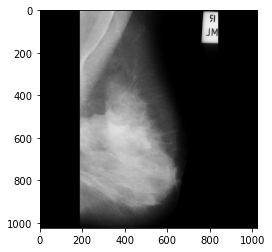

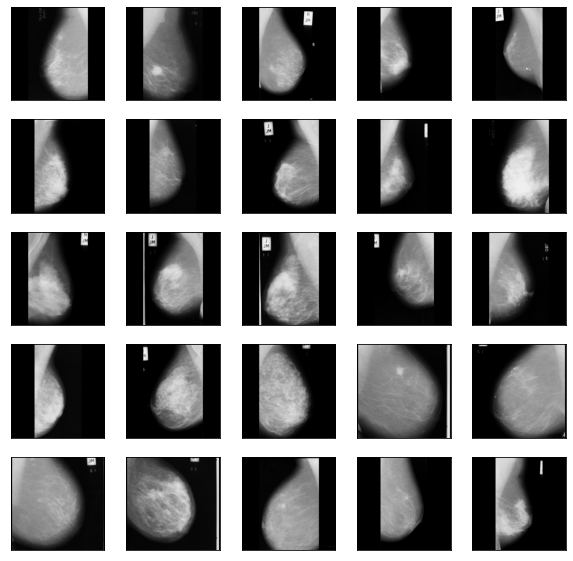

In [23]:
#Show the image with matplotlib
plt.imshow(malignant_images[10])
plt.show()

# Show 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # change set here
    plt.imshow(malignant_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
# Create y_labels one-hot-encoding for each 
y_normal_single = 0
y_malignant_single = 1
y_benign_single = 2

# y-label vectors
y_normal = [y_normal_single] * len(normal_images)
y_malignant = [y_malignant_single] * len(malignant_images)
y_benign = [y_benign_single] * len(benign_images)

# Making one coherent dataset
X = malignant_images + benign_images + normal_images
y = y_malignant + y_benign + y_normal

In [27]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Track composition of X_train and X_test
count_normal = 0
count_benign = 0
count_malignant = 0
for label in y_train:
    if label == 0:
        count_normal += 1
    elif label == 1:
        count_malignant += 1
    elif label == 2:
        count_benign += 1
        
print("Normal: {}; Malignant: {}; Benign: {}".format(count_normal, count_malignant, count_benign))

Normal: 159; Malignant: 39; Benign: 43


In [37]:
# min-max scaling
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0